Assignment-5 Neural Networks and Deep Learning

Name:Ram Janam Yadav Roll No. 181EC136

Name:Manjeet Kumar Roll No. 181EC123

Name:Shiva Kumar Roll No. 181EC244

Q. 1. Build a 1D CNN model from scratch to recognize human activity using HAR dataset (https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) (split dataset into training dataset (80%) and testing dataset (20%) ). For implementation, use a Stochastic gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for Focal loss function

(i) Visualize HAR dataset

(ii) Plot a comparative loss curve for at least 200 epochs.

(iii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test dataset and ROC curve

(iv) Implement above 1D CNN model with Keras Library and verify the above results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data set
train = pd.read_csv("./UCI_HAR_Dataset/train.csv")
test = pd.read_csv("./UCI_HAR_Dataset/test.csv")

In [3]:
final_test = test.copy()

In [4]:
#viewing the data
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
#check the null values 
print(train.isnull().sum())
if(train.isnull().sum().any() !=0):
    print("We have null values")

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [8]:
columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

Text(0, 0.5, 'Count of activities')

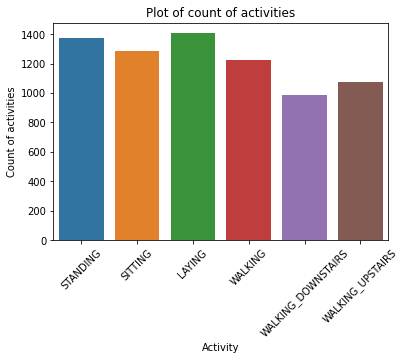

In [9]:
plt.title("Plot of count of activities")
sns.countplot(train.Activity)
plt.xlabel("Activity")
plt.xticks(rotation=45)
plt.ylabel("Count of activities")

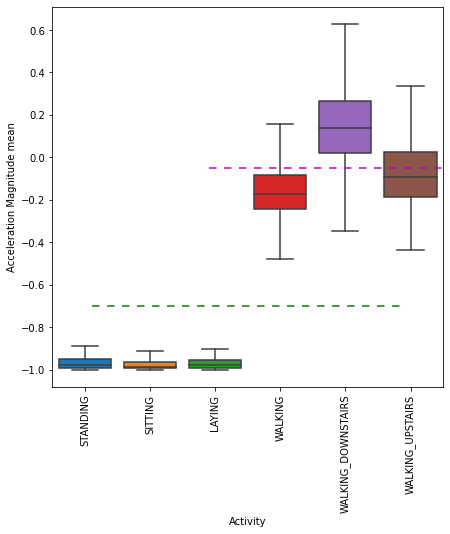

In [10]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

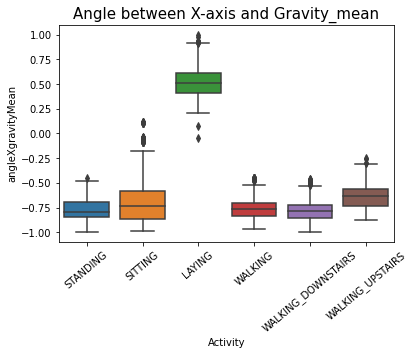

In [11]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

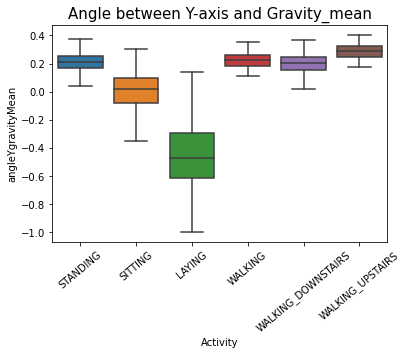

In [12]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
#plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

<AxesSubplot:title={'center':'Activity as per the users'}, xlabel='subject', ylabel='count'>

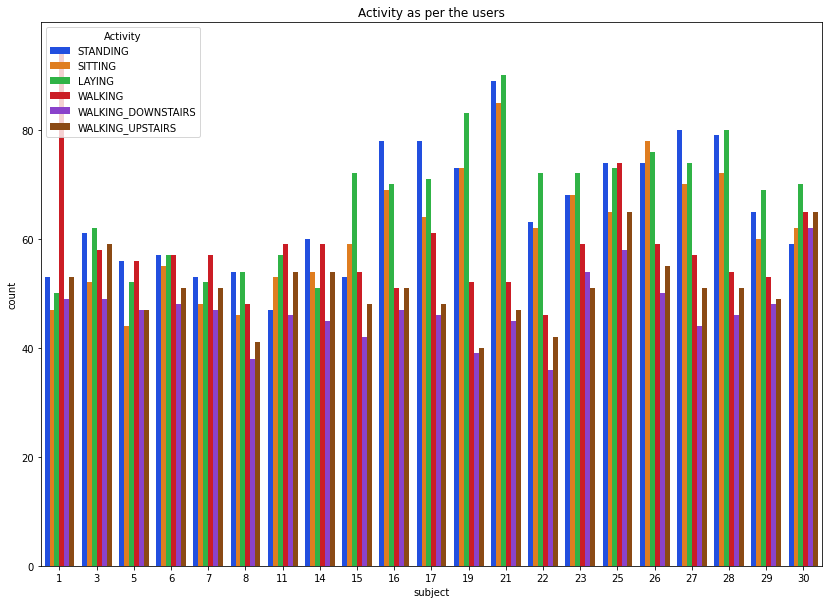

In [13]:
plt.figure(figsize=(14,10))
plt.title('Activity as per the users')
sns.countplot(x='subject',hue='Activity', data=train, palette = 'bright')

In [14]:
train.columns[100:200]

Index(['tBodyAccJerkiqrY', 'tBodyAccJerkiqrZ', 'tBodyAccJerkentropyX',
       'tBodyAccJerkentropyY', 'tBodyAccJerkentropyZ', 'tBodyAccJerkarCoeffX1',
       'tBodyAccJerkarCoeffX2', 'tBodyAccJerkarCoeffX3',
       'tBodyAccJerkarCoeffX4', 'tBodyAccJerkarCoeffY1',
       'tBodyAccJerkarCoeffY2', 'tBodyAccJerkarCoeffY3',
       'tBodyAccJerkarCoeffY4', 'tBodyAccJerkarCoeffZ1',
       'tBodyAccJerkarCoeffZ2', 'tBodyAccJerkarCoeffZ3',
       'tBodyAccJerkarCoeffZ4', 'tBodyAccJerkcorrelationXY',
       'tBodyAccJerkcorrelationXZ', 'tBodyAccJerkcorrelationYZ',
       'tBodyGyromeanX', 'tBodyGyromeanY', 'tBodyGyromeanZ', 'tBodyGyrostdX',
       'tBodyGyrostdY', 'tBodyGyrostdZ', 'tBodyGyromadX', 'tBodyGyromadY',
       'tBodyGyromadZ', 'tBodyGyromaxX', 'tBodyGyromaxY', 'tBodyGyromaxZ',
       'tBodyGyrominX', 'tBodyGyrominY', 'tBodyGyrominZ', 'tBodyGyrosma',
       'tBodyGyroenergyX', 'tBodyGyroenergyY', 'tBodyGyroenergyZ',
       'tBodyGyroiqrX', 'tBodyGyroiqrY', 'tBodyGyroiqrZ', 'tBodyGyroe

(7352, 4)


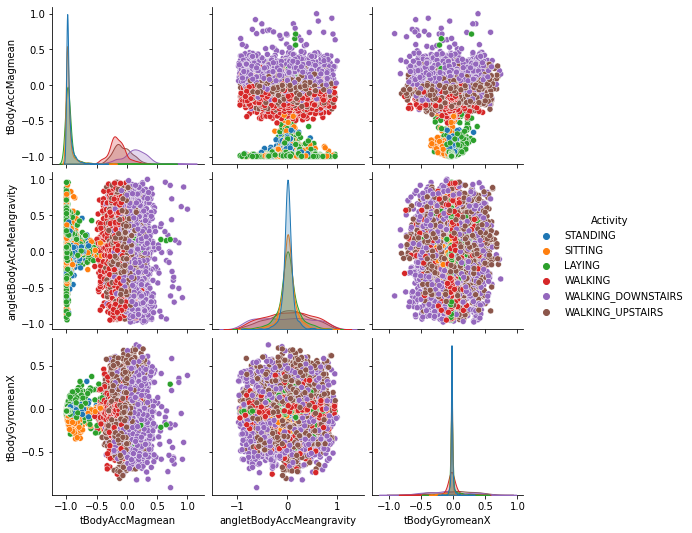

In [15]:
features = ['tBodyAccMagmean','angletBodyAccMeangravity','Activity','tBodyGyromeanX']
train_subset = train[features]
print(train_subset.shape)
sns.pairplot(train_subset, hue='Activity')

In [16]:
X_train=train.iloc[:,:-2]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-2]
y_test=test.iloc[:,-1]

In [17]:
print(X_train.shape)
print(X_test.shape)

(7352, 561)
(2947, 561)


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAccmeanX to angleZgravityMean
dtypes: float64(561)
memory usage: 31.5 MB


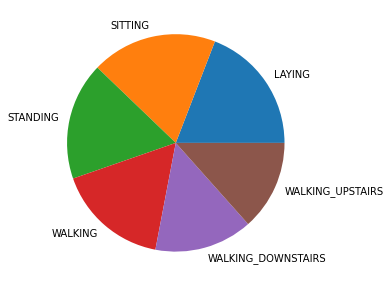

In [19]:
Category_count=np.array(y_train.value_counts())
activity=sorted(y_train.unique())
plt.figure(figsize=(15,5))
plt.pie(Category_count,labels=activity);

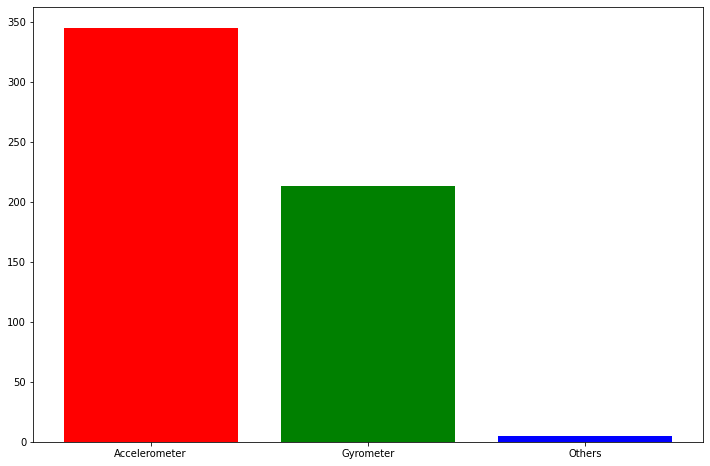

In [20]:
acc=0
gyro=0
others=0
for column in train.columns:
    if "Acc" in str(column):
        acc+=1
    elif "Gyro" in str(column):
        gyro+=1
    else:
        others+=1
        
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer','Gyrometer','Others'],[acc,gyro,others],color=['r','g','b']);

In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([5.07811723e-01, 6.58068027e-02, 2.80643677e-02, 2.50395275e-02,
       1.88828501e-02, 1.72400642e-02, 1.37101147e-02, 1.19907768e-02,
       9.95859511e-03, 9.65086590e-03, 8.60051649e-03, 8.00280950e-03,
       7.63996369e-03, 6.45328924e-03, 6.32324346e-03, 5.99722090e-03,
       5.86750302e-03, 5.75407392e-03, 5.67921047e-03, 5.27295779e-03,
       5.00362925e-03, 4.88408406e-03, 4.78205784e-03, 4.68562930e-03,
       4.49289260e-03, 4.21027243e-03, 4.17978682e-03, 4.05570369e-03,
       3.88524168e-03, 3.87018044e-03, 3.65958878e-03, 3.54553381e-03,
       3.47942606e-03, 3.37187109e-03, 3.29676999e-03, 3.28215050e-03,
       3.20529478e-03, 2.95614939e-03, 2.86722415e-03, 2.85074548e-03,
       2.68766324e-03, 2.65619859e-03, 2.63405989e-03, 2.58850596e-03,
       2.49054872e-03, 2.46954034e-03, 2.40679913e-03, 2.36115075e-03,
       2.30278857e-03, 2.27567245e-03, 2.20164699e-03, 2.13466984e-03,
       2.07704456e-03, 2.02496620e-03, 1.99779441e-03, 1.97750625e-03,
      

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [24]:
model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                35968     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 52,934
Trainable params: 52,934
Non-trainable params: 0
_________________________________________________________________


In [26]:
history=model.fit(X_train,y_train,batch_size=256,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
29/29 [==============================] - 0s 11ms/step - loss: 1.5818 - accuracy: 0.5431 - val_loss: 1.0766 - val_accuracy: 0.5928
Epoch 2/10
29/29 [==============================] - 0s 6ms/step - loss: 0.6540 - accuracy: 0.8132 - val_loss: 0.3113 - val_accuracy: 0.8938
Epoch 3/10
29/29 [==============================] - 0s 6ms/step - loss: 0.1358 - accuracy: 0.9611 - val_loss: 0.1534 - val_accuracy: 0.9440
Epoch 4/10
29/29 [==============================] - 0s 6ms/step - loss: 0.0471 - accuracy: 0.9838 - val_loss: 0.1552 - val_accuracy: 0.9460
Epoch 5/10
29/29 [==============================] - 0s 6ms/step - loss: 0.0311 - accuracy: 0.9890 - val_loss: 0.1459 - val_accuracy: 0.9518
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9916 - val_loss: 0.1626 - val_accuracy: 0.9481
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.1495 - val_accuracy: 0.9539
Epoch 8/10
29/29 [=

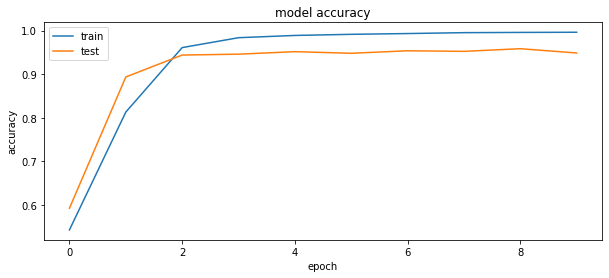

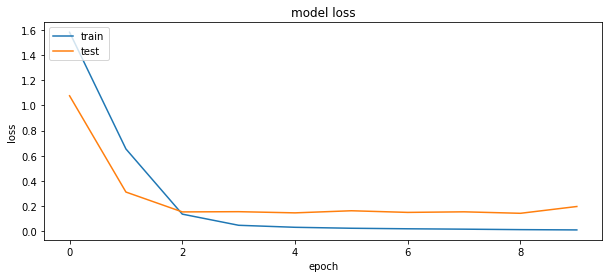

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
y_pred=model.predict(X_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)
y_test_class

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [29]:
y_pred_class

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics=classification_report(y_test_class,y_pred_class)
print(metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(y_test_class,y_pred_class)
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       537
           1       0.98      0.84      0.90       491
           2       0.84      0.98      0.91       532
           3       0.96      0.98      0.97       496
           4       0.98      0.98      0.98       420
           5       0.98      0.95      0.96       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

Confusion Matrix: 
[[517   0  20   0   0   0]
 [  1 411  78   0   0   1]
 [  0   9 523   0   0   0]
 [  0   0   0 487   6   3]
 [  0   0   0   3 410   7]
 [  0   0   0  19   4 448]]


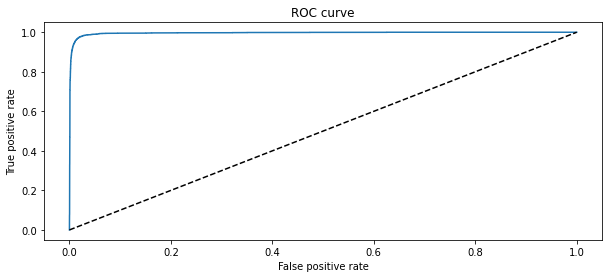

In [31]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

Q2. Python Implementation of LSTM from scratch for Binary to Octal conversion.

In [32]:
import numpy as np

In [33]:
def createMap(bin_oct_map):
    bin_oct_map["000"] = '0'
    bin_oct_map["001"] = '1'
    bin_oct_map["010"] = '2'
    bin_oct_map["011"] = '3'
    bin_oct_map["100"] = '4'
    bin_oct_map["101"] = '5'
    bin_oct_map["110"] = '6'
    bin_oct_map["111"] = '7'
    
def convertBinToOct(bin):
    l = len(bin)
    t = -1
    if '.' in bin:
        t = bin.index('.')
        len_left = t
    else:
        len_left = l
    for i in range(1, (3 - len_left % 3) % 3 + 1):
        bin = '0' + bin
    if (t != -1):
        len_right = l - len_left - 1
        for i in range(1, (3 - len_right % 3) % 3 + 1):
            bin = bin + '0'
    bin_oct_map = {}
    createMap(bin_oct_map)
    i = 0
    octal = ""
     
    while (True) :
        octal += bin_oct_map[bin[i:i + 3]]
        i += 3
        if (i == len(bin)):
            break
             
        if (bin[i] == '.'):
            octal += '.'
            i += 1
             
    return octal

In [34]:
binary_num = '1010101.01'
print((convertBinToOct(binary_num)))

125.2


In [35]:
def dataset(num,bin_len):
    x = np.zeros((num,bin_len))
    y = np.zeros(num)
    
    for i in range(num):
        x[i] = np.round(np.random.rand(bin_len))
        binary_num=""
        for s in x[i]:
            s = str(int(s))
            binary_num+=s
        y[i] = (convertBinToOct(binary_num))
#         print(x[i],y[i])
    return x,y

In [36]:
trainX, trainY = dataset(1000,8)

In [37]:
testX , testY = dataset(20,8)

In [38]:
import tensorflow as tf

# Parameters
x_len = 8
no_of_samples = 1000
lr = 0.01
training_steps= 50000
display_step = 10000

n_input = x_len
timestep = 1
n_hidden = 18
n_output = 1

In [39]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.compat.v1.placeholder(tf.float32,[None,timestep,n_input])
Y = tf.compat.v1.placeholder(tf.float32,[None,n_output])

Instructions for updating:
non-resource variables are not supported in the long term


In [40]:
weights = tf.Variable(tf.random.normal([n_hidden, n_output]))
bias = tf.Variable(tf.random.normal([n_output]))

In [41]:
# The RNN model
def RNN(x, W, b):
    x = tf.unstack(x, timestep, 1)
    lstm_cell = tf.keras.layers.LSTMCell(n_hidden)
    outputs, states = tf.compat.v1.nn.static_rnn(lstm_cell, x, dtype=tf.float32)
    return tf.matmul(outputs[-1], W) + b

logits = RNN(X, weights, bias)

trainX = np.reshape(trainX, [-1, timestep, n_input])
trainY = np.reshape(trainY, [-1, n_output])

testX = np.reshape(testX, [-1, timestep, n_input])
testY = np.reshape(testY, [-1, n_output])

loss = tf.reduce_mean(tf.losses.mean_squared_error(logits, Y))
optimizer = tf.compat.v1.train.RMSPropOptimizer(lr)
train = optimizer.minimize(loss)

with tf.compat.v1.Session() as sess:
    tf.compat.v1.global_variables_initializer().run()

    for step in range(training_steps):
        _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        if (step+1) % display_step == 0:
            print("Step: ", step+1, "\tLoss: ", _loss)

    print("Optimization Finished")

    result = sess.run(logits, feed_dict={X: testX})
    result = sess.run(tf.round(result))

    for i in range(20):
        print(testY[i], ' -> ', result[i])  

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Step:  10000 	Loss:  0.7213844
Step:  20000 	Loss:  0.73029137
Step:  30000 	Loss:  0.46106997
Step:  40000 	Loss:  0.48230195
Step:  50000 	Loss:  0.43351522
Optimization Finished
[21.]  ->  [21.]
[376.]  ->  [376.]
[170.]  ->  [171.]
[37.]  ->  [37.]
[14.]  ->  [14.]
[260.]  ->  [260.]
[243.]  ->  [243.]
[17.]  ->  [17.]
[37.]  ->  [37.]
[306.]  ->  [307.]
[125.]  ->  [126.]
[302.]  ->  [303.]
[35.]  ->  [35.]
[245.]  ->  [245.]
[257.]  ->  [258.]
[352.]  ->  [353.]
[145.]  ->  [146.]
[60.]  ->  [60.]
[160.]  ->  [160.]
[361.]  ->  [362.]


Q.3. Implement A CNN-RNN (LSTM) Framework using (Keras/Tensorflow/Pytorch) for Crop Yield Prediction (reference paper, and dataset attached and other related dataset is available at https://github.com/saeedkhaki92/CNN-RNN-Yield-Prediction). For implementation, use a Stochastic gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for RMSE as l loss function

(i) Plot a comparative loss curve for at least 100 epochs.

(ii) Compare for Soybean and Corn yield prediction performance (RMSE and Correlation
Coefficient) for years 2016, 2017, and 2018 of 1D CNN, RNN(LSTM), and CNN- RNN(LSTM)

Q4. Python Implementation of GRU from scratch for Binary to Deceimal conversion.

In [42]:
def bin2int(bin_list):
	bin_str = ""
	for k in bin_list:
		bin_str += str(int(k))
	return int(bin_str, 2)
	
# Generate the dataset, i.e., the binary number and their answers
# 	num = 1000	: size of the dataset
#	bin_len = 8	: the size of the binary number to be genrated
#	Returns: it returns the x and y. The x contains the binary number and y contains their answers 	
def dataset(num, bin_len):
	x = np.zeros((num, bin_len))
	y = np.zeros((num))

	for i in range(num):
		x[i] = np.round(np.random.rand(bin_len)).astype(int)
		y[i] = bin2int(x[i])
	return x, y	


# Parameters
x_len = 8
no_of_samples = 1000
lr = 0.01
training_steps= 50000
display_step = 5000

n_input = x_len
timestep = 1
n_hidden = 16
n_output = 1

# Training and tsting dataset
trainX, trainY = dataset(no_of_samples, x_len)
testX, testY = dataset(20, x_len)

# Graph input 
X = tf.placeholder(tf.float32, [None, timestep, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

# Weights and bias
weights = tf.Variable(tf.random_normal([n_hidden, n_output]))
bias = tf.Variable(tf.random_normal([n_output]))

# The RNN model
def RNN(x, W, b):
    x = tf.unstack(x, timestep, 1)
    lstm_cell = tf.keras.layers.LSTMCell(n_hidden)
    outputs, states = tf.compat.v1.nn.static_rnn(lstm_cell, x, dtype=tf.float32)
    return tf.matmul(outputs[-1], W) + b


logits = RNN(X, weights, bias)

trainX = np.reshape(trainX, [-1, timestep, n_input])
trainY = np.reshape(trainY, [-1, n_output])

testX = np.reshape(testX, [-1, timestep, n_input])
testY = np.reshape(testY, [-1, n_output])

loss = tf.reduce_mean(tf.losses.mean_squared_error(logits, Y))
optimizer = tf.train.RMSPropOptimizer(lr)
train = optimizer.minimize(loss)

with tf.Session() as sess:
	tf.global_variables_initializer().run()

	for step in range(training_steps):
		_, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
		if (step+1) % display_step == 0:
			print("Step: ", step+1, "\tLoss: ", _loss)

	print("Optimization Finished")

	result = sess.run(logits, feed_dict={X: testX})
	result = sess.run(tf.round(result))

	print("Real \t Guess")
	for i in range(20):
		print(testY[i], ' -> ', result[i])


Step:  5000 	Loss:  2.331761
Step:  10000 	Loss:  2.07318
Step:  15000 	Loss:  1.7049459
Step:  20000 	Loss:  1.8367761
Step:  25000 	Loss:  1.5117009
Step:  30000 	Loss:  1.7734452
Step:  35000 	Loss:  1.6397357
Step:  40000 	Loss:  1.6210034
Step:  45000 	Loss:  1.5611119
Step:  50000 	Loss:  1.4941624
Optimization Finished
Real 	 Guess
[58.]  ->  [59.]
[81.]  ->  [82.]
[121.]  ->  [123.]
[244.]  ->  [245.]
[121.]  ->  [123.]
[82.]  ->  [83.]
[123.]  ->  [125.]
[246.]  ->  [247.]
[181.]  ->  [182.]
[11.]  ->  [11.]
[120.]  ->  [121.]
[74.]  ->  [75.]
[172.]  ->  [173.]
[68.]  ->  [69.]
[77.]  ->  [78.]
[189.]  ->  [191.]
[10.]  ->  [10.]
[212.]  ->  [213.]
[12.]  ->  [12.]
[213.]  ->  [215.]


Q. 5. Build a CNN(AleNet) model (using Keras/Tensorflow/Pytorch) to recognize breast cancer from Breast Dataset (Use Sklearn Dataset and split dataset into training dataset (80%) and testing dataset (20%) ). Use an Adam gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the parameters of the CNN model for Focal loss function.

(i) Plot a comparative loss curve for at least 200 epochs.

(ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test datset and ROC curve for each loss function.

In [43]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [44]:
data = load_breast_cancer()

In [45]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

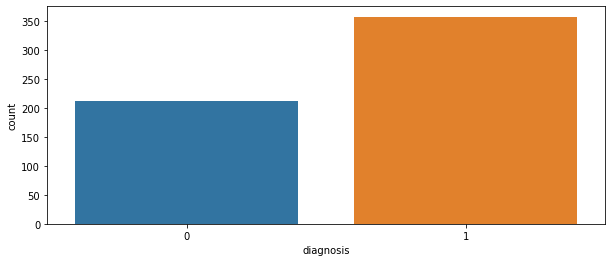

In [46]:
df = df.dropna(axis=1)
df['diagnosis'].value_counts()
#Visualize this count 
sns.countplot(df['diagnosis'],label="Count")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension')])

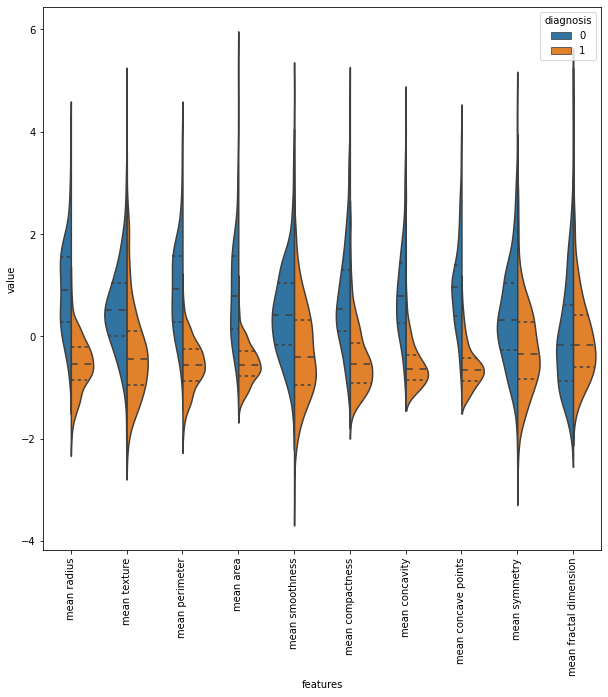

In [47]:
y = df.diagnosis
lists = ['diagnosis']
# X includes our features
X = df.drop(lists,axis = 1)
# get the first ten features
data_dia = y
data = X
data_std = (data-data.mean()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


<AxesSubplot:>

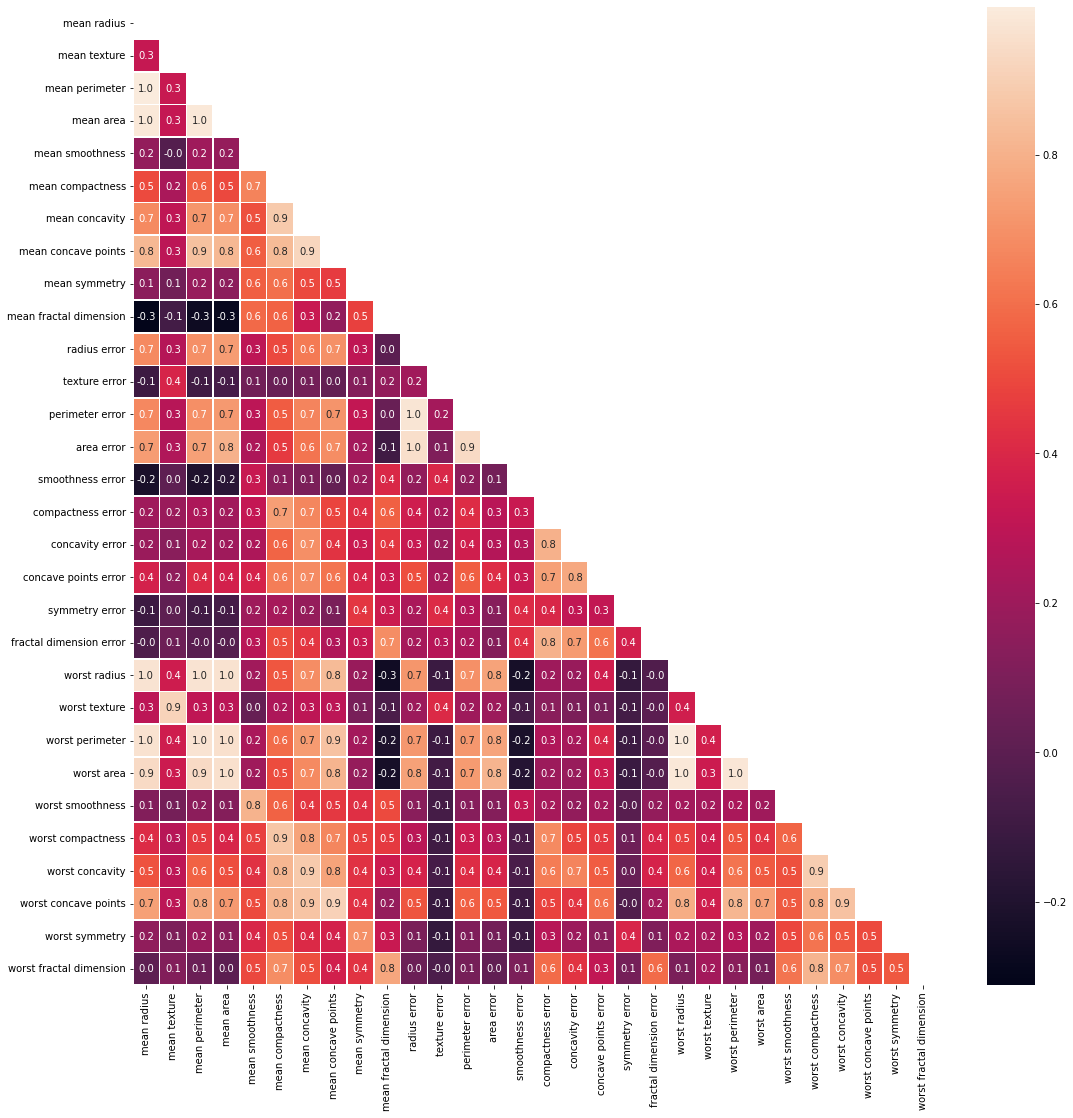

In [48]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

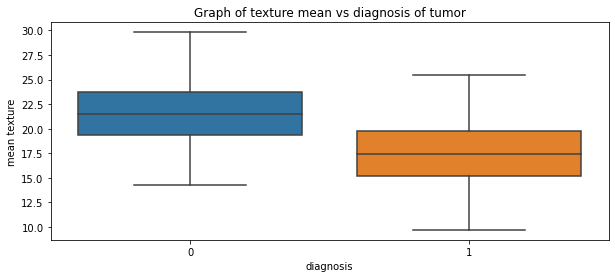

In [49]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='mean texture', data=df, showfliers=False)
plot.set_title("Graph of texture mean vs diagnosis of tumor")

In [50]:
# make a new dataframe with only the desired feature for t test
from scipy import stats
new = pd.DataFrame(data=df[['worst area', 'diagnosis']])
new = new.set_index('diagnosis')

In [51]:
# Create correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
X = X.drop(X[to_drop], axis=1)
X.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst texture', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y, random_state = 17)

In [53]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.33999916e-01, 1.44052777e-01, 1.02575561e-01, 8.35019584e-02,
       6.27879398e-02, 5.24207173e-02, 2.17725510e-02, 2.03918452e-02,
       1.64931529e-02, 1.30349700e-02, 1.19900456e-02, 9.12433669e-03,
       7.97907981e-03, 6.46052961e-03, 3.42793314e-03, 2.32055678e-03,
       2.01369594e-03, 1.44689982e-03, 1.33631478e-03, 1.14236949e-03,
       8.13653604e-04, 5.89607303e-04, 3.23589179e-04])

In [54]:
print(X_train.shape,X_test.shape)
print(y_train.shape)
print(y_test.shape)

(341, 23) (228, 23)
(341, 2)
(228, 2)


In [55]:
model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=2,kernel_initializer='uniform',activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [56]:
history=model.fit(X_train,y_train,batch_size=256,epochs=15,validation_data=(X_test,y_test))

Train on 341 samples, validate on 228 samples
Epoch 1/15
256/341 [=====================>........] - ETA: 0s - loss: 0.6932 - acc: 0.4180WARNING:tensorflow:From c:\users\ram janam yadav\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
341/341 [==============================] - 0s 214us/sample - loss: 0.6930 - acc: 0.4868 - val_loss: 0.6913 - val_acc: 0.7193
Epoch 2/15
341/341 [==============================] - 0s 18us/sample - loss: 0.6910 - acc: 0.7126 - val_loss: 0.6889 - val_acc: 0.7675
Epoch 3/15
341/341 [==============================] - 0s 15us/sample - loss: 0.6883 - acc: 0.7771 - val_loss: 0.6853 - val_acc: 0.8684
Epoch 4/15
341/341 [==============================] - 0s 15us/sample - l

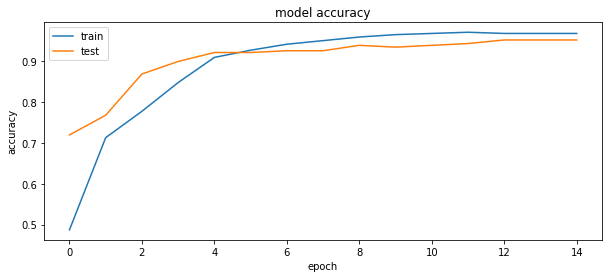

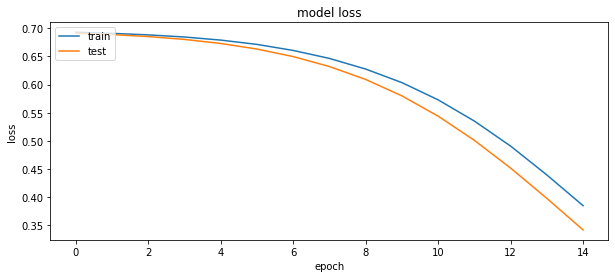

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
y_pred=model.predict(X_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [59]:
y_pred_class

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics=classification_report(y_test_class,y_pred_class)
print(metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(y_test_class,y_pred_class)
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        85
           1       0.95      0.98      0.96       143

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228

Confusion Matrix: 
[[ 77   8]
 [  3 140]]


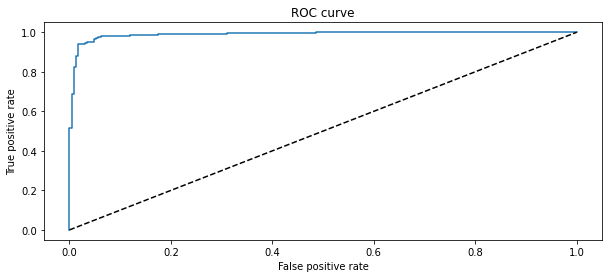

In [61]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()